---
# Exploratory Data Analysis: 911 Calls (Solutions)
---

Complete the *instructions* ($I$) or answer the *questions* ($Q$) using your ***Python3 kernel*** and your ***Data Science skills***!

> For this EDA we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Please, download de compressed data file in this [link](https://mega.nz/#!EFRXEA4K!NAW9GMgLO_s916DYB3EJ8KCL27GhKFzgn5LFrOb3OxM), and then extract its content. The 'data.csv' file contains the following fields:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



---
# Setup and Data
---

---
#### $I$:  Create a directory called `'test01mat123456789'` and `cd` into it. Inside this directory, create a file called `'test01.py'`, and also, create a directory called `'datasets'`, then move the `'data.csv'` file inside `datasets`.

In [1]:
%%bash 
tree ./test01mat123456789/

./test01mat123456789/
├── datasets
│   └── data.csv
└── test01.py

1 directory, 2 files


---
#### $I$: Import Python libraries for Data Analysis and Visualization. 

---
#### $I$: Load the `'data.csv'` file as a dataframe called `'df'`.
> ***Hint:***  absolute vs. relative path

---
#### $I$: Print the `info` (metadata) associated to the `'df'` data frame.
> ***Hint***:  `help(pd.DataFrame.info)` 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB
None


---
# Basic data frame exploration
---

---
#### $Q$:  How many `columns` does the `df` object have?
> ***Hint***:  Find DataFrame attributes using `dir(pd.DataFrame)`

9

---
#### $I$:  Print the first 3 (*`heading`*) rows of the `df` data frame. 
> ***Hint***:  `help(pd.Series.head)`

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


---
#### $Q$:  What are the *most frequently-occurring*  `'zip'` codes  for 911 calls? Print the first 3 elements.
> ***Hint***:  `help(pd.Series.value_counts)`

19401.0    6979
19464.0    6643
19403.0    4854
Name: zip, dtype: int64

---
#### $Q$:  What are the *most frequently-occurring*  townships (`'twp'`) for 911 calls? Print the first 3 elements.

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
Name: twp, dtype: int64

---
#### $Q$:  If we check the `'title'` series, how many `unique` *title codes* are there?
> **NOTE**: In the `'title'` column, there are *Departments* (reasons) specified before the *title code*. These *reasons* are EMS (Emergency Medical Services), Fire, and Traffic. 

> ***Hint***: `help(pd.Series.unique)` *and*  `help(pd.Series.nunique)`

110

---
#### $I$ - Create a new feature (new column) called `'Reason'` by using the following expression:
    df['title'].apply(lambda title: title.split(':')[0])
> ***Hint***:
+ `df['title'][0].split(':')[0]`
+ `help(pd.Series.apply)`
+ For example, if the **`df['title'][0]`** value is **`"EMS: BACK PAINS/INJURY"`**, the **`df['Reason'][0]`** value will be **`EMS`**, which is obtained with **`df['title'][0].split(':')[0]`**. 

---
#### $Q$: Based on the `'Reason'` column, what is the *most likely* cause for a 911 call?
> ***Hint***:  
+ `help(pd.Series.value_counts)`
+ `help(pd.Series.idxmax)`
+ `help(pd.Series.index.tolist)`

'EMS'

---
#### $I$:  Use `Seaborn` to create a `countplot` of 911 calls by `'Reason'`.

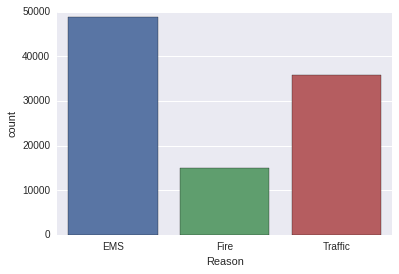

---
# Time information 
---

---
#### $Q$. What is the data type of the objects in the `'timeStamp'` column?
> ***Hint***: Integer-location based indexing

str

---   
####  $I$:  Replace the `string` values in the `'timeStamp'` column with `DateTime` objects,  by using the following expression:
        pd.to_datetime(df['timeStamp'])
        
> **NOTE**: From last question, you should have notice that the **`'timeStamp'`** elements are `strings`. We will use the pandas method `pd.to_datetime`  to convert `string` to `DateTime` objects.        

---
#### $Q$:  Now, what is the data type of the objects in the `'timeStamp'` column?
> ***Hint***: Integer-location based indexing

pandas._libs.tslib.Timestamp

---
#### $I$:  Use the `dir()` function to quickly overview the various attributes/methods available for the elements in the `'timeStamp'` series.
> ***Hint***: Integer-location based indexing

---
#### $I$: Based on the `'timeStamp'` column, create 3 new columns called `'Hour'`, `'Month'`, and `'Day of Week'`,  by using the following expressions:
    df['timeStamp'].apply(lambda time: time.hour)
    df['timeStamp'].apply(lambda time: time.month)
    df['timeStamp'].apply(lambda time: time.dayofweek)

> **NOTE**:  Now that the elements of the `'timeStamp'`column are `DateTime` objects, you can call and get specific *attributes*, e.g., `df['timeStamp'].iloc[0].hour`


---
#### $I$: Use the `unique` series method to print the values of the series `'Day of Week'`.  How many values there are?
> ***Hint***: `help(pd.Series.unique)` 

array([3, 4, 5, 6, 0, 1, 2])

---
#### $I$:  Use the `map` series method  to *replace* the values in the  `'Day of Week'` column  with the `string` names (day of the week) in the following dictionary: 
    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
    df['Day of Week'].map(dmap)
> **Hint**: help(pd.Series.map)    

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

---
#### $I$: Use `Seaborn` to create a `countplot` of the `'Day of Week'` column with the `hue='Reason'`.
> ***Hint***: help(sns.countplot)

> **NOTE**: To relocate the legend use: `plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)`

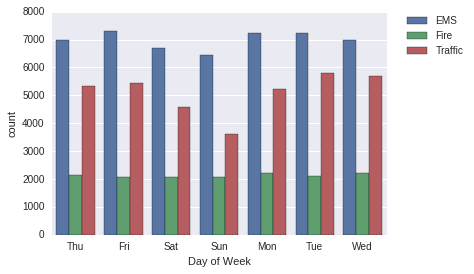

---
#### $I$:  Use `Seaborn` to create a `countplot` of the `'Month'` column with the `hue='Reason'`.
> ***Hint***: help(sns.countplot)

> **NOTE**: To relocate the legend use: `plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)`

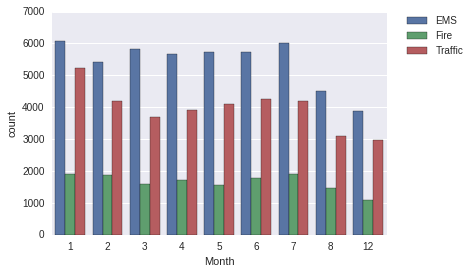

---
#### $Q$:  Did you notice something *strange* about the `'Month'` values in the plot? 

---
####  $I$: Let's plot the same information in another way. First, create a new `DataFrame` called `byMonth`, where we `group` the original `df` data frame  `by`  the `'Month'` column,  and then use the `count()` method for **aggregation**. 
> ***Hint***:   `help(pd.DataFrame.groupby)`

> **NOTE**: pd.DataFrame.groupby  is similar to the SQL statement:
+ `SELECT column_name FROM table_name WHERE condition GROUP BY column_name ORDER BY column_name; `

In [23]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


#### Now, in order to transform the values of the `'Month'` index into actual data, we can reset the DataFrame indexes, by modifying the `byMonth` DataFrame in place (i.e., do not create a new object but permanently change the original one)
> ***Hint***:  `help(pd.DataFrame.reset_index)`

In [24]:
byMonth.reset_index(inplace=True)
byMonth

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


---
#### $Q$:  What is the *arithmetic mean* of the `'Reason'` series in the `byMonth` dataframe? 

11054.666666666666

---
#### $I$:  Use `Seaborn jointplot`  to plot `'Month' vs.'Reason'` and a linear regression model fit, between those columns. 

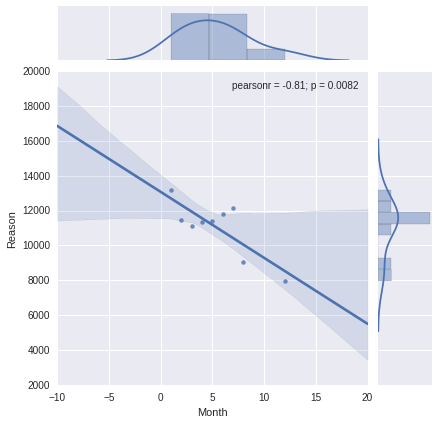

---
#### $Q$: What can you say about this Exploratory Data Analysis. Draw some conclusions from the plots you have obtained so far.